<a href="https://colab.research.google.com/github/besherh/Machine-Learning-Course/blob/master/statistical%20inference/1_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Correlation?
Correlation is a way to determine if two variables in a dataset are related in any way. Correlations have many real-world applications. We can see if using certain search terms are correlated to views on youtube. Or, we can see if ads are correlated to sales. When building machine learning models correlations are an important factor in determining features. Not only can this help us to see which features are linear related, but if features are strongly correlated we can remove them to prevent duplicating information.


#How Do You Measure Correlation?
In data science we can use the r value, also called Pearson’s correlation coefficient. This measures how closely two sequences of numbers( i.e., columns, lists, series, etc.) are correlated.
The r value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.
The rvalue formula is:
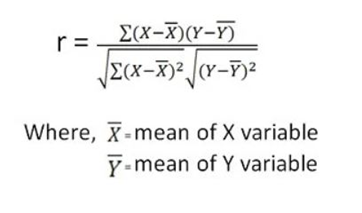


The data we’ll look at comes from a Kaggle dataset about movies on streaming platforms. This dataset contains data on which movies are what streaming platforms. It also includes a few various qualifiers about each movie such as name, runtime, IMDB score, etc.


#Importing and a little cleaning
We’ll first import the dataset and turn it into a DataFrame using pandas.


In [ ]:
import pandas as pd
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
df.shape

(16744, 17)

The Rotten Tomatoes column is a string, let’s change the data type to a float.


In [ ]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace("%" , "").astype(float)


The Type column doesn’t seem to be entered properly, let’s drop it.


In [ ]:
df.drop("Type", inplace=True, axis=1)


#Using the corr() method
Using the Pandas correlation method we can see correlations for all numerical columns in the DataFrame. Since this is a method, all we have to do is call it on the DataFrame. The return value will be a new DataFrame showing each correlation.
*the corr() method has a parameter that allows you to choose which method to find the correlation coefficient. The Pearson method is the default, but you can also choose the Kendall or Spearman method.


In [ ]:
#corr(method='pearson', method = 'spearman', method = '' ) 
#refer to : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

correlations = df.corr()
print(correlations)


                 Unnamed: 0        ID  ...   Disney+   Runtime
Unnamed: 0         1.000000  1.000000  ...  0.287011 -0.206003
ID                 1.000000  1.000000  ...  0.287011 -0.206003
Year              -0.254391 -0.254391  ... -0.046819  0.081984
IMDb              -0.399953 -0.399953  ...  0.075895  0.088987
Rotten Tomatoes   -0.201452 -0.201452  ... -0.011805  0.003791
Netflix           -0.708680 -0.708680  ... -0.088927  0.099526
Hulu              -0.219737 -0.219737  ... -0.034317  0.033985
Prime Video        0.554120  0.554120  ... -0.298900 -0.067378
Disney+            0.287011  0.287011  ...  1.000000 -0.019976
Runtime           -0.206003 -0.206003  ... -0.019976  1.000000

[10 rows x 10 columns]


Yikes! That is a lot of numbers. The output has too many columns making it hard to read. This is only the correlations for 9 variables which results in a 9x9 grid. Can you imagine looking at 20 or 30? It would be very difficult.


#Examining one variable
We could also check each variable individually by slicing using the column name.


In [ ]:
print(correlations["Year"])


Unnamed: 0        -0.254391
ID                -0.254391
Year               1.000000
IMDb              -0.021181
Rotten Tomatoes   -0.057137
Netflix            0.258533
Hulu               0.098009
Prime Video       -0.253377
Disney+           -0.046819
Runtime            0.081984
Name: Year, dtype: float64


This is a little easier to read and sufficient if only looking at the correlations for 1 variable. But, there must be an easier way to look at a whole dataset.


#Use Seaborn to the visualise the correlation matrix
Lucky for us, seaborn gives us the ability to quickly generate a heat map.
We simply import seaborn and matplotlib and use seaborn’s heatmap() function.


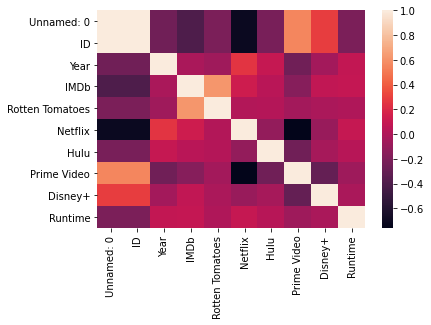

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()


Now we can quickly see a few correlations;

A strong positive correlation between IMDb and Rotten Tomatoes. As well as a strong positive correlation between Prime Video and ID.

A slight positive correlation between Netflix and Year.

Strong negative correlations between Netflix and ID, Netflix and Prime Video

Slight negative correlations between Year and Prime Video, Disney Plus and Prime Video, Hulu and Prime Video, and Netflix and ID.


No correlation between runtime and any of the streaming platforms. No correlation between Netflix and year
